Topic:        Challenge Set **3**  
Subject:      Pandas movies    
Date:         01/21/2018  
Name:         Christine Liu   
Worked with:  Louisa Ying   

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
# various options in pandas
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

#### Challenge 1

Plot domestic total gross over time

In [2]:
df = pd.read_csv('2013_movies.csv')

In [3]:
df.shape

(100, 7)

In [4]:
df.ReleaseDate = pd.to_datetime(df.ReleaseDate, format = "%Y-%m-%d" )

Text(0,0.5,'Domestic Total Gross Amount')

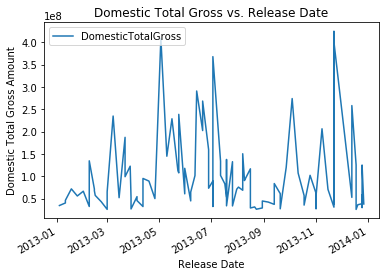

In [5]:

plot = df.plot('ReleaseDate', 'DomesticTotalGross', title = 'Domestic Total Gross vs. Release Date');
plot.set_xlabel('Release Date')
plot.set_ylabel('Domestic Total Gross Amount')


# plt.plot_date(x = df.ReleaseDate.values, y = df.DomesticTotalGross.values)
# plt.plot(x = df.ReleaseDate.values, y = df.DomesticTotalGross.values)
# WHY DIDNT THIS WORK?!?!


#### Challenge 2

Plot runtime vs. domestic total gross.

Text(0,0.5,'Domestic Total Gross (USD)')

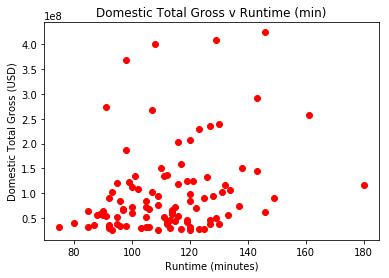

In [6]:
plt.scatter(df.Runtime, df.DomesticTotalGross, c = 'red');
plt.title('Domestic Total Gross v Runtime (min)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Domestic Total Gross (USD)')

#### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.


In [7]:
df.columns, df.shape

(Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
        'Runtime', 'ReleaseDate'],
       dtype='object'), (100, 7))

In [8]:
df1 = df.groupby('Rating').agg({'Runtime':'mean', 'DomesticTotalGross':'mean'})

# this also works - so many ways to do things in pandas!
# df2 = df.groupby('Rating')['Runtime', 'DomesticTotalGross'].mean()

In [9]:
df1.head()

,Runtime,DomesticTotalGross
Rating,,
G,107.000,2.685e+08
PG,99.933,1.311e+08
PG-13,117.511,1.114e+08
R,110.730,6.989e+07


#### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.
"

In [10]:
# number of MPAA ratings are 4
n = df.Rating.nunique()
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [11]:
df.Rating.unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

In [12]:
df_G = df[df.Rating == 'G']
df_PG = df[df.Rating == 'PG']
df_PG13 = df[df.Rating == 'PG-13']
df_R = df[df.Rating == 'R']

In [68]:
#df.groupby('Rating').plot(subplots = True)

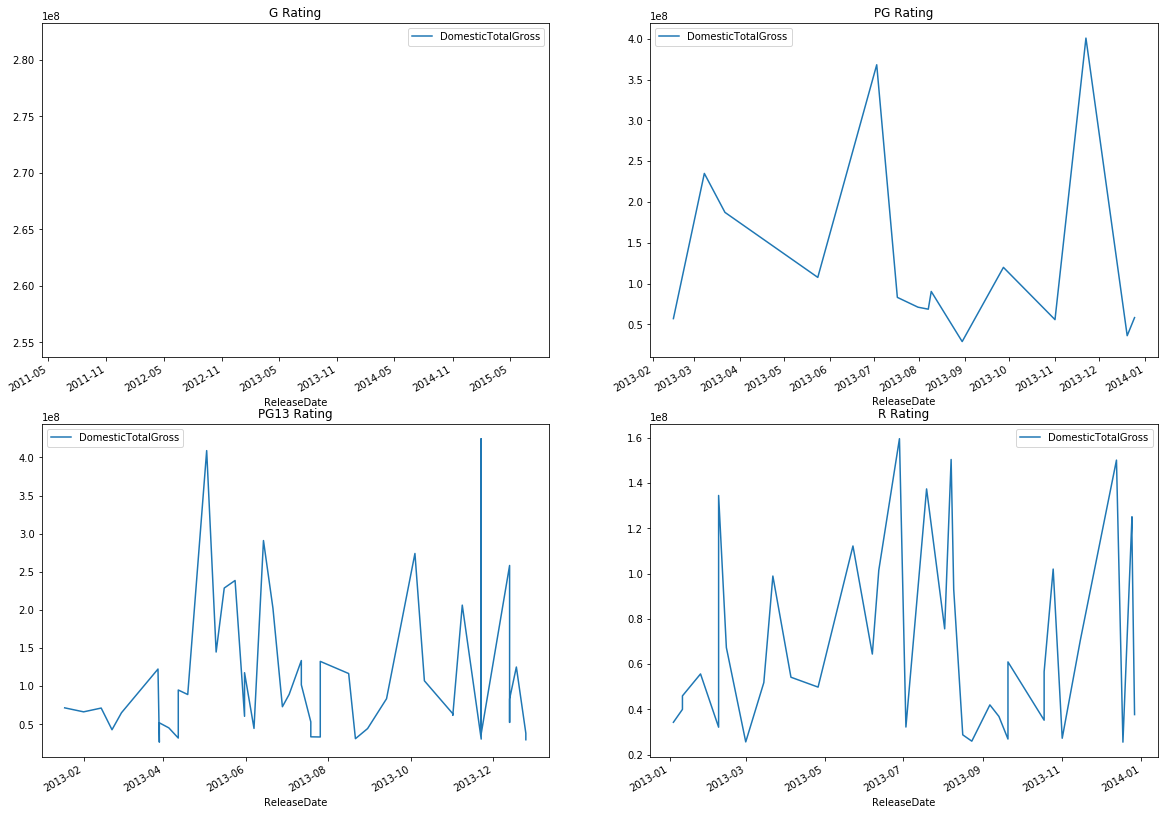

In [13]:
#create subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2);
df_G.plot(y = 'DomesticTotalGross', x = 'ReleaseDate', title = 'G Rating',ax = axes[0,0], figsize = (20,15))
df_PG.plot(y = 'DomesticTotalGross', x = 'ReleaseDate', title = 'PG Rating', ax = axes[0,1])
df_PG13.plot(y = 'DomesticTotalGross', x = 'ReleaseDate', title = 'PG13 Rating', ax = axes[1,0])
df_R.plot(y = 'DomesticTotalGross', x = 'ReleaseDate', title = 'R Rating', ax = axes[1,1])


#how to create subplot axis title?
# axes.set_ylabel= ('WHY DIDNT YOU WORK')

#### Challenge 5

What director in your dataset has the highest gross per movie?

In [15]:
#df.columns

In [16]:
df.groupby('Director')['DomesticTotalGross'].mean().sort_values(ascending = False).head(1)

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

In [97]:
#lol, only looking for the max
# df[df.DomesticTotalGross == df.DomesticTotalGross.max()]

#### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.  
 
Title of graph should include: Mean Domestic Total Gross by Month in 2013  

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."  

In [19]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

In [22]:
#adding a column for month

df['Month'] = df['ReleaseDate'].apply(lambda x: x.strftime('%B'))
# df_month = df.groupby('Month')['DomesticTotalGross'].mean()
# df_month.head()

Month
April       6.094e+07
August      6.853e+07
December    8.748e+07
February    6.739e+07
January     4.954e+07
Name: DomesticTotalGross, dtype: float64

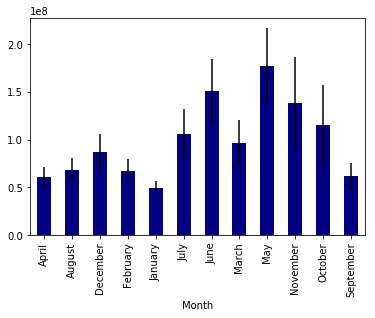

In [30]:
#creating standard error of means
error = df.groupby('Month').DomesticTotalGross.sem()
df.groupby('Month').DomesticTotalGross.mean().plot(kind='bar', yerr=error,color = bl);

In [180]:
#dfbin = df.groupby(pd.Grouper(key = 'ReleaseDate', freq='M'))['DomesticTotalGross'].mean()


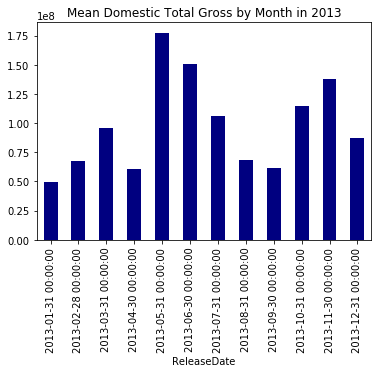

In [174]:
dfbin.plot(kind = 'bar',title = 'Mean Domestic Total Gross by Month in 2013',color = 'navy')

In [31]:
# how to either order the month bars or to rename the month bars